In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn.preprocessing import MinMaxScaler

def getNormalizedData(X):
   
    # fit scaler on training data
    norm = MinMaxScaler().fit(X)

    # transform training data
    X_norm = norm.transform(X)
    X_norm = pd.DataFrame(X_norm, columns=X.columns.values)

    X_norm;
    return X_norm;

import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
walk_Acc = pd.read_excel('Walking_Acceleration.xlsx')
walk_AngV = pd.read_excel('Walking_AngularVelo.xlsx')
walk_Mag = pd.read_excel('Walking_MagneticField.xlsx')
walk_Orin = pd.read_excel('Walking_Orientation.xlsx')

In [4]:
walk_Acc.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2020-11-30 12:01:47.077,-0.089963,2.492467,9.784852
1,2020-11-30 12:01:47.177,-0.282612,2.645149,8.818761
2,2020-11-30 12:01:47.277,-0.419727,3.033741,9.072184
3,2020-11-30 12:01:47.377,-0.386197,3.523822,9.044791
4,2020-11-30 12:01:47.477,-0.338746,3.364104,9.383237


In [5]:
walk_AngV.head()

,Timestamp,AngV_X,AngV_Y,AngV_Z
0,2020-11-30 12:01:47.077,0.323005,0.372976,-0.032985
1,2020-11-30 12:01:47.177,0.060661,-0.126003,-0.060682
2,2020-11-30 12:01:47.277,-0.216043,-0.481006,0.070391
3,2020-11-30 12:01:47.377,-0.207850,0.082311,0.086819
4,2020-11-30 12:01:47.477,-0.299071,-0.038918,0.060425


In [6]:
walk_AngV= walk_AngV.drop('Timestamp',axis=1)
walk_Mag = walk_Mag.drop('Timestamp',axis=1)
walk_Orin = walk_Orin.drop('Timestamp',axis=1)

In [7]:
frames = [walk_Acc,walk_AngV,walk_Mag,walk_Orin]

In [8]:
walk_Activity = pd.concat(frames,axis=1)

In [9]:
walk_Activity.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
0,2020-11-30 12:01:47.077,-0.089963,2.492467,9.784852,0.323005,0.372976,-0.032985,11.622643,-21.531006,-42.124146,-90.221135,-15.912525,-1.582119
1,2020-11-30 12:01:47.177,-0.282612,2.645149,8.818761,0.060661,-0.126003,-0.060682,12.409363,-22.467499,-41.537354,-90.111041,-16.891443,-0.419361
2,2020-11-30 12:01:47.277,-0.419727,3.033741,9.072184,-0.216043,-0.481006,0.070391,12.504395,-21.854233,-41.914642,-89.767256,-16.688728,-0.213985
3,2020-11-30 12:01:47.377,-0.386197,3.523822,9.044791,-0.207850,0.082311,0.086819,11.747520,-21.640663,-42.585968,-89.658539,-15.908141,-0.844301
4,2020-11-30 12:01:47.477,-0.338746,3.364104,9.383237,-0.299071,-0.038918,0.060425,11.956604,-20.740524,-43.184235,-89.664538,-14.612726,-0.523812


In [10]:
walk_Activity['Activity Name'] = 'Walking'
walk_Activity['Activity']=1

In [11]:
walk_Activity.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity Name,Activity
0,2020-11-30 12:01:47.077,-0.089963,2.492467,9.784852,0.323005,0.372976,-0.032985,11.622643,-21.531006,-42.124146,-90.221135,-15.912525,-1.582119,Walking,1
1,2020-11-30 12:01:47.177,-0.282612,2.645149,8.818761,0.060661,-0.126003,-0.060682,12.409363,-22.467499,-41.537354,-90.111041,-16.891443,-0.419361,Walking,1
2,2020-11-30 12:01:47.277,-0.419727,3.033741,9.072184,-0.216043,-0.481006,0.070391,12.504395,-21.854233,-41.914642,-89.767256,-16.688728,-0.213985,Walking,1
3,2020-11-30 12:01:47.377,-0.386197,3.523822,9.044791,-0.207850,0.082311,0.086819,11.747520,-21.640663,-42.585968,-89.658539,-15.908141,-0.844301,Walking,1
4,2020-11-30 12:01:47.477,-0.338746,3.364104,9.383237,-0.299071,-0.038918,0.060425,11.956604,-20.740524,-43.184235,-89.664538,-14.612726,-0.523812,Walking,1


In [12]:
shaking_Acc = pd.read_excel('Shaking_Acceleration.xlsx')
shaking_AngV = pd.read_excel('Shaking_AngularVelo.xlsx')
shaking_Mag = pd.read_excel('Shaking_MagneticField.xlsx')
shaking_Orin = pd.read_excel('Shaking_Orientation.xlsx')

In [13]:
shaking_Acc.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2021-01-14 21:31:26.738,0.351319,2.044149,8.880583
1,2021-01-14 21:31:26.838,-1.148112,2.759661,10.905721
2,2021-01-14 21:31:26.938,-1.753753,5.396428,9.696087
3,2021-01-14 21:31:27.038,-0.492775,4.970564,10.085278
4,2021-01-14 21:31:27.138,0.236808,3.938310,9.919872


In [14]:
shaking_Acc.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2021-01-14 21:31:26.738,0.351319,2.044149,8.880583
1,2021-01-14 21:31:26.838,-1.148112,2.759661,10.905721
2,2021-01-14 21:31:26.938,-1.753753,5.396428,9.696087
3,2021-01-14 21:31:27.038,-0.492775,4.970564,10.085278
4,2021-01-14 21:31:27.138,0.236808,3.938310,9.919872


In [15]:
shaking_AngV= shaking_AngV.drop('Timestamp',axis=1)
shaking_Mag = shaking_Mag.drop('Timestamp',axis=1)
shaking_Orin = shaking_Orin.drop('Timestamp',axis=1)

In [16]:
frames2 = [shaking_Acc,shaking_AngV,shaking_Mag,shaking_Orin]
shaking_Activity = pd.concat(frames2,axis=1)
shaking_Activity.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
0,2021-01-14 21:31:26.738,0.351319,2.044149,8.880583,0.841391,0.068791,-0.319710,7.957352,-26.465233,-41.685303,-89.898726,-15.700291,1.261653
1,2021-01-14 21:31:26.838,-1.148112,2.759661,10.905721,0.471514,1.586229,0.516208,11.759850,-30.540443,-37.640594,-93.282774,-19.904381,7.257734
2,2021-01-14 21:31:26.938,-1.753753,5.396428,9.696087,-1.840550,-0.611501,1.226632,7.027992,-27.011597,-41.542358,-100.556063,-13.951075,3.378653
3,2021-01-14 21:31:27.038,-0.492775,4.970564,10.085278,0.355443,0.227982,1.117888,3.781189,-29.106979,-40.300262,-105.769688,-16.526815,1.327907
4,2021-01-14 21:31:27.138,0.236808,3.938310,9.919872,0.804384,0.594625,0.770579,4.038200,-32.439278,-37.884644,-110.174577,-21.339446,3.542156


In [17]:
shaking_Activity['Activity Name'] = 'Shaking'
shaking_Activity['Activity']=2
shaking_Activity.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity Name,Activity
0,2021-01-14 21:31:26.738,0.351319,2.044149,8.880583,0.841391,0.068791,-0.319710,7.957352,-26.465233,-41.685303,-89.898726,-15.700291,1.261653,Shaking,2
1,2021-01-14 21:31:26.838,-1.148112,2.759661,10.905721,0.471514,1.586229,0.516208,11.759850,-30.540443,-37.640594,-93.282774,-19.904381,7.257734,Shaking,2
2,2021-01-14 21:31:26.938,-1.753753,5.396428,9.696087,-1.840550,-0.611501,1.226632,7.027992,-27.011597,-41.542358,-100.556063,-13.951075,3.378653,Shaking,2
3,2021-01-14 21:31:27.038,-0.492775,4.970564,10.085278,0.355443,0.227982,1.117888,3.781189,-29.106979,-40.300262,-105.769688,-16.526815,1.327907,Shaking,2
4,2021-01-14 21:31:27.138,0.236808,3.938310,9.919872,0.804384,0.594625,0.770579,4.038200,-32.439278,-37.884644,-110.174577,-21.339446,3.542156,Shaking,2


In [18]:
drop_Acc = pd.read_excel('Dropping_Acceleration.xlsx')
drop_AngV = pd.read_excel('Dropping_AngularVelo.xlsx')
drop_Mag = pd.read_excel('Dropping_MagneticField.xlsx')
drop_Orin = pd.read_excel('Dropping_Orientation.xlsx')

In [19]:
drop_Acc.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z
0,2021-01-02 01:04:03.088,2.492168,3.220852,7.723339
1,2021-01-02 01:04:03.188,2.193539,2.494862,6.633156
2,2021-01-02 01:04:03.288,0.531994,2.980302,9.283694
3,2021-01-02 01:04:03.387,1.099464,3.810177,7.311546
4,2021-01-02 01:04:03.487,-0.098046,3.241809,8.550369


In [20]:
drop_AngV.head()

,Timestamp,AngV_X,AngV_Y,AngV_Z
0,2021-01-02 01:04:03.088,0.139243,-0.532677,-0.607907
1,2021-01-02 01:04:03.188,0.279314,0.190875,-1.114994
2,2021-01-02 01:04:03.287,0.485871,0.795902,-0.258823
3,2021-01-02 01:04:03.387,-0.133567,0.880308,-0.629498
4,2021-01-02 01:04:03.487,0.416449,0.936509,1.286425


In [21]:
drop_AngV= drop_AngV.drop('Timestamp',axis=1)
drop_Mag = drop_Mag.drop('Timestamp',axis=1)
drop_Orin = drop_Orin.drop('Timestamp',axis=1)

In [22]:
frames3 = [drop_Acc,drop_AngV,drop_Mag,drop_Orin]
dropping_Activity = pd.concat(frames3,axis=1)
dropping_Activity.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
0,2021-01-02 01:04:03.088,2.492168,3.220852,7.723339,0.139243,-0.532677,-0.607907,-5.974007,8.099014,-50.841339,-33.066547,-13.977050,-7.172725
1,2021-01-02 01:04:03.188,2.193539,2.494862,6.633156,0.279314,0.190875,-1.114994,-1.270180,3.694710,-51.189606,-27.870710,-15.044364,-12.514911
2,2021-01-02 01:04:03.288,0.531994,2.980302,9.283694,0.485871,0.795902,-0.258823,0.080780,3.243950,-50.955780,-25.934471,-19.373850,-6.980087
3,2021-01-02 01:04:03.387,1.099464,3.810177,7.311546,-0.133567,0.880308,-0.629498,0.951248,5.233795,-51.337830,-25.215570,-19.697186,-5.057325
4,2021-01-02 01:04:03.487,-0.098046,3.241809,8.550369,0.416449,0.936509,1.286425,2.857162,0.164162,-51.461365,-22.776925,-17.793051,-2.972979


In [23]:
dropping_Activity['Activity Name'] = 'Dropping'
dropping_Activity['Activity']=3
dropping_Activity.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity Name,Activity
0,2021-01-02 01:04:03.088,2.492168,3.220852,7.723339,0.139243,-0.532677,-0.607907,-5.974007,8.099014,-50.841339,-33.066547,-13.977050,-7.172725,Dropping,3
1,2021-01-02 01:04:03.188,2.193539,2.494862,6.633156,0.279314,0.190875,-1.114994,-1.270180,3.694710,-51.189606,-27.870710,-15.044364,-12.514911,Dropping,3
2,2021-01-02 01:04:03.288,0.531994,2.980302,9.283694,0.485871,0.795902,-0.258823,0.080780,3.243950,-50.955780,-25.934471,-19.373850,-6.980087,Dropping,3
3,2021-01-02 01:04:03.387,1.099464,3.810177,7.311546,-0.133567,0.880308,-0.629498,0.951248,5.233795,-51.337830,-25.215570,-19.697186,-5.057325,Dropping,3
4,2021-01-02 01:04:03.487,-0.098046,3.241809,8.550369,0.416449,0.936509,1.286425,2.857162,0.164162,-51.461365,-22.776925,-17.793051,-2.972979,Dropping,3


In [24]:
frames4 = [walk_Activity,shaking_Activity,dropping_Activity]
df_grp = pd.concat(frames4,axis=0)
df_grp.head()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity Name,Activity
0,2020-11-30 12:01:47.077,-0.089963,2.492467,9.784852,0.323005,0.372976,-0.032985,11.622643,-21.531006,-42.124146,-90.221135,-15.912525,-1.582119,Walking,1
1,2020-11-30 12:01:47.177,-0.282612,2.645149,8.818761,0.060661,-0.126003,-0.060682,12.409363,-22.467499,-41.537354,-90.111041,-16.891443,-0.419361,Walking,1
2,2020-11-30 12:01:47.277,-0.419727,3.033741,9.072184,-0.216043,-0.481006,0.070391,12.504395,-21.854233,-41.914642,-89.767256,-16.688728,-0.213985,Walking,1
3,2020-11-30 12:01:47.377,-0.386197,3.523822,9.044791,-0.207850,0.082311,0.086819,11.747520,-21.640663,-42.585968,-89.658539,-15.908141,-0.844301,Walking,1
4,2020-11-30 12:01:47.477,-0.338746,3.364104,9.383237,-0.299071,-0.038918,0.060425,11.956604,-20.740524,-43.184235,-89.664538,-14.612726,-0.523812,Walking,1


In [25]:
df_grp.tail()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity Name,Activity
1204,2021-01-02 01:06:03.341,0.830922,-0.210462,19.679426,0.094960,0.493180,-0.007924,15.829544,5.500221,-42.456207,-125.122453,-1.550342,14.291948,Dropping,3
1205,2021-01-02 01:06:03.441,0.552052,-0.010927,11.143876,-0.013694,-0.046080,0.011607,15.577858,5.245293,-41.803314,-124.939342,-1.946113,15.953585,Dropping,3
1206,2021-01-02 01:06:03.541,0.555345,-0.011376,8.821306,0.004306,-0.004899,0.009719,15.826988,5.249535,-42.379944,-124.946631,-1.941165,15.894604,Dropping,3
1207,2021-01-02 01:06:03.641,0.540376,-0.057031,9.789792,0.026633,-0.026264,0.009855,15.697601,5.360008,-42.069458,-124.971061,-1.884046,15.079003,Dropping,3
1208,2021-01-02 01:06:03.741,0.529449,-0.032632,10.059082,0.005189,-0.020006,0.007211,NaN,NaN,NaN,-125.024524,-1.752490,13.253472,Dropping,3


In [26]:
df_grp = df_grp.reset_index()
df_grp.tail()

,index,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity Name,Activity
3675,1204,2021-01-02 01:06:03.341,0.830922,-0.210462,19.679426,0.094960,0.493180,-0.007924,15.829544,5.500221,-42.456207,-125.122453,-1.550342,14.291948,Dropping,3
3676,1205,2021-01-02 01:06:03.441,0.552052,-0.010927,11.143876,-0.013694,-0.046080,0.011607,15.577858,5.245293,-41.803314,-124.939342,-1.946113,15.953585,Dropping,3
3677,1206,2021-01-02 01:06:03.541,0.555345,-0.011376,8.821306,0.004306,-0.004899,0.009719,15.826988,5.249535,-42.379944,-124.946631,-1.941165,15.894604,Dropping,3
3678,1207,2021-01-02 01:06:03.641,0.540376,-0.057031,9.789792,0.026633,-0.026264,0.009855,15.697601,5.360008,-42.069458,-124.971061,-1.884046,15.079003,Dropping,3
3679,1208,2021-01-02 01:06:03.741,0.529449,-0.032632,10.059082,0.005189,-0.020006,0.007211,NaN,NaN,NaN,-125.024524,-1.752490,13.253472,Dropping,3


In [27]:
df_grp = df_grp.drop('index',axis=1)
df_grp.tail()

,Timestamp,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z,Activity Name,Activity
3675,2021-01-02 01:06:03.341,0.830922,-0.210462,19.679426,0.094960,0.493180,-0.007924,15.829544,5.500221,-42.456207,-125.122453,-1.550342,14.291948,Dropping,3
3676,2021-01-02 01:06:03.441,0.552052,-0.010927,11.143876,-0.013694,-0.046080,0.011607,15.577858,5.245293,-41.803314,-124.939342,-1.946113,15.953585,Dropping,3
3677,2021-01-02 01:06:03.541,0.555345,-0.011376,8.821306,0.004306,-0.004899,0.009719,15.826988,5.249535,-42.379944,-124.946631,-1.941165,15.894604,Dropping,3
3678,2021-01-02 01:06:03.641,0.540376,-0.057031,9.789792,0.026633,-0.026264,0.009855,15.697601,5.360008,-42.069458,-124.971061,-1.884046,15.079003,Dropping,3
3679,2021-01-02 01:06:03.741,0.529449,-0.032632,10.059082,0.005189,-0.020006,0.007211,NaN,NaN,NaN,-125.024524,-1.752490,13.253472,Dropping,3


# Data Cleaning

<AxesSubplot:>

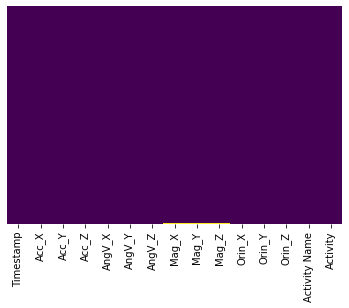

In [28]:
sns.heatmap(df_grp.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [29]:
print('No of duplicates in Dataset : {}'.format(sum(df_grp.duplicated())))


No of duplicates in Dataset : 0


In [30]:
print('We have {} NaN/Null values in Dataset'.format(df_grp.isnull().values.sum()))

We have 3 NaN/Null values in Dataset


In [31]:
df_grp = df_grp.dropna(axis=0)

In [32]:
print('We have {} NaN/Null values in Dataset'.format(df_grp.isnull().values.sum()))

We have 0 NaN/Null values in Dataset


In [33]:
df_grp.to_csv('Final Dataset.csv', index=False)

#### Feature Selection

In [34]:
df_grp.columns

Index(['Timestamp', 'Acc_X', 'Acc_Y', 'Acc_Z', 'AngV_X', 'AngV_Y', 'AngV_Z',
       'Mag_X', 'Mag_Y', 'Mag_Z', 'Orin_X', 'Orin_Y', 'Orin_Z',
       'Activity Name', 'Activity'],
      dtype='object')

In [35]:
df_grp_features = ['Acc_X', 'Acc_Y','Acc_Z','AngV_X','AngV_Y','AngV_Z','Mag_X', 'Mag_Y', 'Mag_Z', 'Orin_X', 'Orin_Y', 'Orin_Z']
X = df_grp[df_grp_features]
X.describe

<bound method NDFrame.describe of           Acc_X     Acc_Y      Acc_Z    AngV_X    AngV_Y    AngV_Z      Mag_X  \
0     -0.089963  2.492467   9.784852  0.323005  0.372976 -0.032985  11.622643   
1     -0.282612  2.645149   8.818761  0.060661 -0.126003 -0.060682  12.409363   
2     -0.419727  3.033741   9.072184 -0.216043 -0.481006  0.070391  12.504395   
3     -0.386197  3.523822   9.044791 -0.207850  0.082311  0.086819  11.747520   
4     -0.338746  3.364104   9.383237 -0.299071 -0.038918  0.060425  11.956604   
...         ...       ...        ...       ...       ...       ...        ...   
3674 -13.504168 -0.835712  35.517990  0.382393 -6.749397 -0.201667  14.357063   
3675   0.830922 -0.210462  19.679426  0.094960  0.493180 -0.007924  15.829544   
3676   0.552052 -0.010927  11.143876 -0.013694 -0.046080  0.011607  15.577858   
3677   0.555345 -0.011376   8.821306  0.004306 -0.004899  0.009719  15.826988   
3678   0.540376 -0.057031   9.789792  0.026633 -0.026264  0.009855  15.6976

In [36]:
y=df_grp.Activity
y.describe

<bound method NDFrame.describe of 0       1
1       1
2       1
3       1
4       1
       ..
3674    3
3675    3
3676    3
3677    3
3678    3
Name: Activity, Length: 3679, dtype: int64>

In [37]:
X.describe()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
count,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000
mean,-5.502466,-1.284851,5.794759,-0.120285,-0.064253,0.033008,15.997906,-7.009748,-22.770388,-66.119951,-0.728312,25.034497
std,8.412026,16.460415,8.649483,1.854247,2.754327,3.664800,20.883199,28.281802,27.390587,88.767628,31.576042,54.713737
min,-75.892481,-57.805593,-34.175432,-15.853715,-34.945221,-12.555598,-72.978279,-48.404945,-98.093719,-179.766555,-58.922827,-177.734507
25%,-9.585168,-7.504345,0.857866,-0.779299,-0.740977,-1.056150,2.609882,-36.694260,-41.291748,-125.855318,-29.291377,2.561622
50%,-4.358037,-1.002465,4.276158,0.003736,-0.044892,0.011095,16.687706,-6.786850,-29.148834,-93.876001,-3.287969,13.694822
75%,0.007559,0.857716,9.535396,0.665050,0.674043,1.467552,29.479134,15.266022,-13.627457,-57.567568,14.157252,78.970507
max,42.301434,58.985289,80.881007,14.052273,34.685471,10.763440,64.552307,61.613541,84.575546,179.707746,82.112738,178.472246


In [38]:
X=getNormalizedData(X);
X.describe()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
count,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000,3679.000000
mean,0.595547,0.483948,0.347396,0.526096,0.500942,0.539842,0.646956,0.376257,0.412348,0.316147,0.412623,0.569245
std,0.071171,0.140939,0.075176,0.062003,0.039556,0.157159,0.151844,0.257064,0.149946,0.246937,0.223887,0.153601
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.561004,0.430695,0.304488,0.504060,0.491224,0.493136,0.549610,0.106443,0.310955,0.149972,0.210099,0.506156
50%,0.605229,0.486366,0.334198,0.530243,0.501220,0.538903,0.651971,0.378283,0.377430,0.238934,0.394474,0.537411
75%,0.642165,0.502294,0.379908,0.552356,0.511545,0.601361,0.744979,0.578730,0.462400,0.339938,0.518168,0.720663
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Splitting Data into Train, Test and Validation Data

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [40]:
print(X_train.shape, X_test.shape, X_val.shape)

(2354, 12) (736, 12) (589, 12)


# Data Exploration

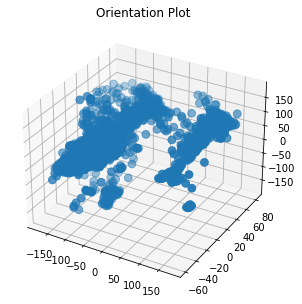

In [41]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = df_grp['Orin_Z']
xline = df_grp['Orin_X']
yline = df_grp['Orin_Y']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Orientation Plot')
plt.show()

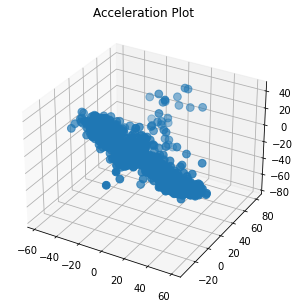

In [42]:
fig = plt.figure(figsize=(9,5))

ax = plt.axes(projection='3d')
zline = df_grp['Acc_X']
xline = df_grp['Acc_Y']
yline = df_grp['Acc_Z']
ax.scatter3D(xline, yline, zline, cmap='rainbow',s=60);
plt.title('Acceleration Plot')
plt.show()

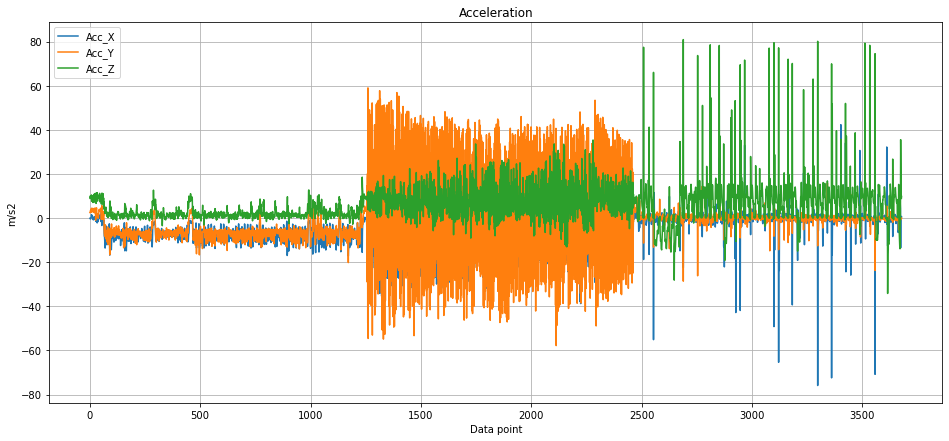

In [43]:
title='Acceleration'
ylabel='m/s2'
xlabel='Data point'

ax5 = df_grp['Acc_X'].plot(figsize=(16,7),legend=True)
ax5 = df_grp['Acc_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_grp['Acc_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

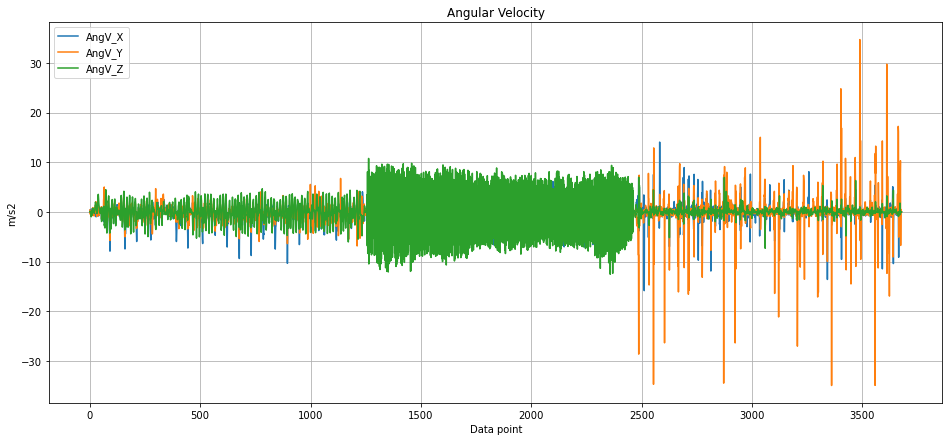

In [44]:
title='Angular Velocity'
ylabel='m/s2'
xlabel='Data point'

ax5 = df_grp['AngV_X'].plot(figsize=(16,7),legend=True)
ax5 = df_grp['AngV_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_grp['AngV_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

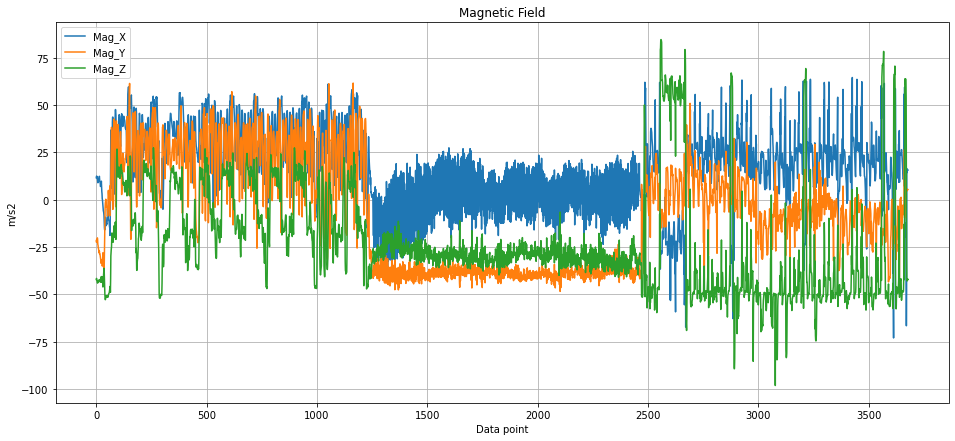

In [45]:
title='Magnetic Field'
ylabel='m/s2'
xlabel='Data point'

ax5 = df_grp['Mag_X'].plot(figsize=(16,7),legend=True)
ax5 = df_grp['Mag_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_grp['Mag_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

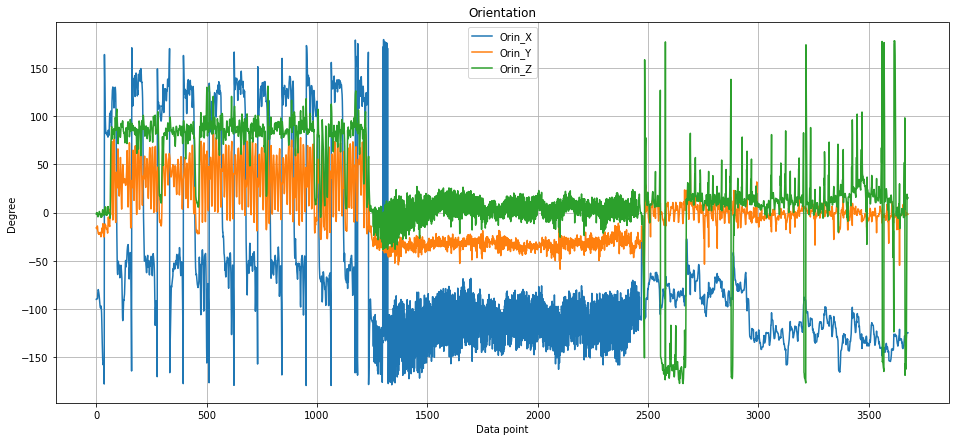

In [46]:
title='Orientation'
ylabel='Degree'
xlabel='Data point'

ax5 = df_grp['Orin_X'].plot(figsize=(16,7),legend=True)
ax5 = df_grp['Orin_Y'].plot(figsize=(16,7),legend=True)
ax5 = df_grp['Orin_Z'].plot(figsize=(16,7),legend=True)



ax5.set(xlabel=xlabel, ylabel=ylabel,title=title);

ax5.yaxis.grid(True)
ax5.xaxis.grid(True)

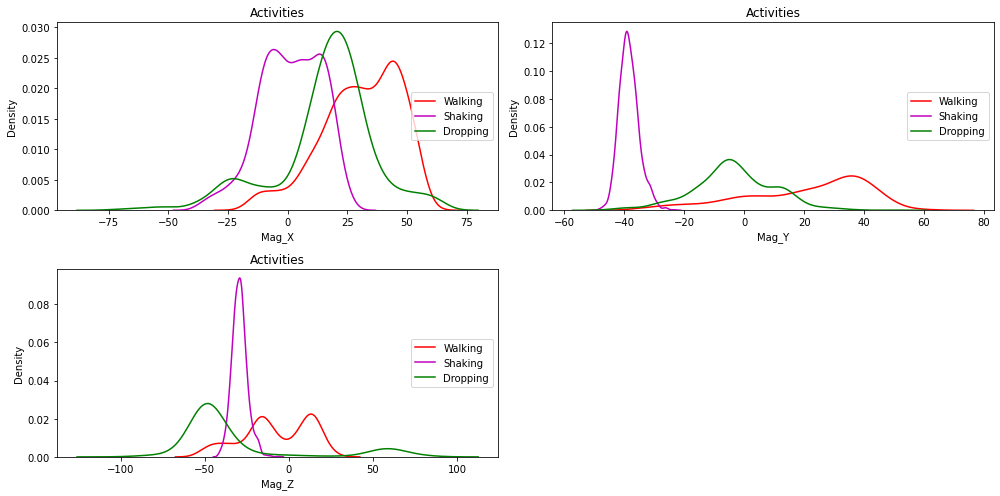

In [47]:
df1 = df_grp[df_grp['Activity']==1]
df2 = df_grp[df_grp['Activity']==2]
df3 = df_grp[df_grp['Activity']==3]


plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Activities')
sns.distplot(df1['Mag_X'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['Mag_X'],color = 'm',hist = False,label = 'Shaking')
sns.distplot(df3['Mag_X'],color = 'green',hist = False, label = 'Dropping')

plt.legend(loc='center right')

plt.subplot(2,2,2)
plt.title('Activities')
sns.distplot(df1['Mag_Y'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['Mag_Y'],color = 'm',hist = False,label = 'Shaking')
sns.distplot(df3['Mag_Y'],color = 'green',hist = False, label = 'Dropping')
plt.legend(loc='center right')

plt.subplot(2,2,3)
plt.title('Activities')
sns.distplot(df1['Mag_Z'],color = 'red',hist = False, label = 'Walking')
sns.distplot(df2['Mag_Z'],color = 'm',hist = False,label = 'Shaking')
sns.distplot(df3['Mag_Z'],color = 'green',hist = False, label = 'Dropping')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

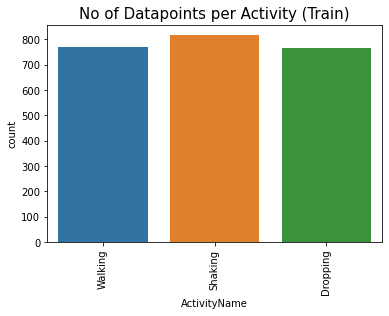

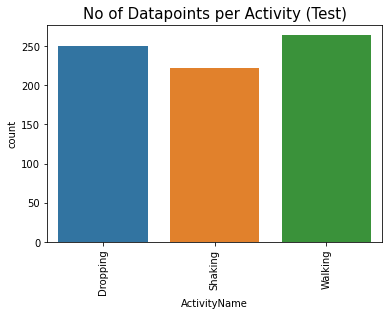

In [48]:
y_train_labels = y_train.map({1: 'Walking', 2:'Shaking',3:'Dropping'})

train = X_train
train['Activity'] = y_train
train['ActivityName'] = y_train_labels
train.sample()

y_test_labels = y_test.map({1: 'Walking', 2:'Shaking',3:'Dropping'})
test = X_test
test['Activity'] = y_test
test['ActivityName'] = y_test_labels
test.sample()

plt.title('No of Datapoints per Activity (Train)', fontsize=15)
sns.countplot(train.ActivityName)
plt.xticks(rotation=90)
plt.show()

plt.title('No of Datapoints per Activity (Test)', fontsize=15)
sns.countplot(test.ActivityName)
plt.xticks(rotation=90)
plt.show()

In [49]:
print(X_train.shape, X_test.shape, X_val.shape)

(2354, 14) (736, 14) (589, 12)


In [50]:
X_train= X_train.drop('Activity',axis=1)

In [51]:
X_train= X_train.drop('ActivityName',axis=1)

In [52]:
X_test= X_test.drop('Activity',axis=1)

In [53]:
X_test= X_test.drop('ActivityName',axis=1)

In [54]:
print(X_train.shape, X_test.shape, X_val.shape)

(2354, 12) (736, 12) (589, 12)


In [55]:
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

#### Apply T-sne on the data

In [56]:
from sklearn.manifold import TSNE

In [57]:
def perform_tsne(X, y, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
       
        print('\nperforming tsne with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X)
        print('Done..')
                 
        print('Creating plot for this t-sne visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'label':y})
    
        markers = [1,2,3]
        sns.lmplot(data=df, x='x', y='y', hue='label', fit_reg=False, size=8,\
                   palette="Set1",markers=markers)
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()
        print('Done')

In [62]:
X_pre_tsne = X_train
y_pre_tsne = train['ActivityName']


performing tsne with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 2354 samples in 0.012s...
[t-SNE] Computed neighbors for 2354 samples in 0.062s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2354
[t-SNE] Computed conditional probabilities for sample 2000 / 2354
[t-SNE] Computed conditional probabilities for sample 2354 / 2354
[t-SNE] Mean sigma: 0.019304
[t-SNE] Computed conditional probabilities in 0.026s
[t-SNE] Iteration 50: error = 109.4795532, gradient norm = 0.1671073 (50 iterations in 0.346s)
[t-SNE] Iteration 100: error = 91.9143906, gradient norm = 0.1330916 (50 iterations in 0.247s)
[t-SNE] Iteration 150: error = 85.9624481, gradient norm = 0.1125364 (50 iterations in 0.224s)
[t-SNE] Iteration 200: error = 82.6300430, gradient norm = 0.1127263 (50 iterations in 0.213s)
[t-SNE] Iteration 250: error = 80.2282486, gradient norm = 0.0933248 (50 iterations in 0.218s)
[t-SNE] KL divergence after 250 iterat

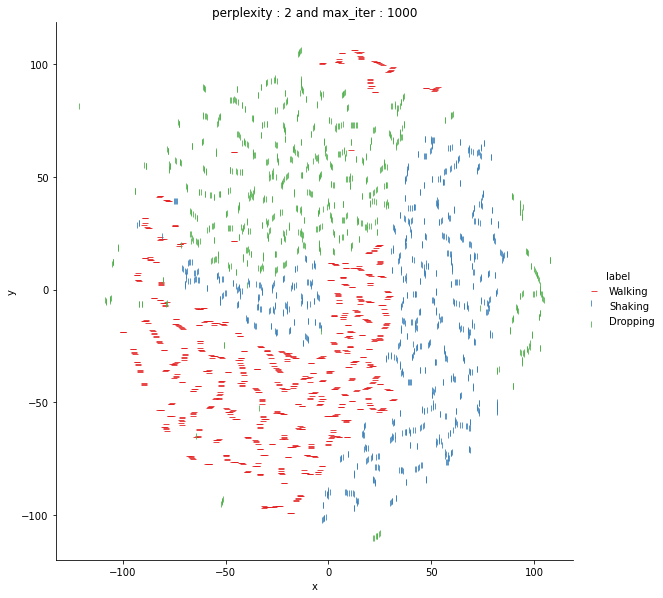

Done

performing tsne with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 2354 samples in 0.017s...
[t-SNE] Computed neighbors for 2354 samples in 0.137s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2354
[t-SNE] Computed conditional probabilities for sample 2000 / 2354
[t-SNE] Computed conditional probabilities for sample 2354 / 2354
[t-SNE] Mean sigma: 0.036813
[t-SNE] Computed conditional probabilities in 0.065s
[t-SNE] Iteration 50: error = 99.3228302, gradient norm = 0.1274760 (50 iterations in 1.047s)
[t-SNE] Iteration 100: error = 82.0314407, gradient norm = 0.0735219 (50 iterations in 0.930s)
[t-SNE] Iteration 150: error = 77.5892944, gradient norm = 0.0544862 (50 iterations in 0.759s)
[t-SNE] Iteration 200: error = 75.3738403, gradient norm = 0.0427513 (50 iterations in 1.199s)
[t-SNE] Iteration 250: error = 74.0058289, gradient norm = 0.0394582 (50 iterations in 1.047s)
[t-SNE] KL divergence after 250 i

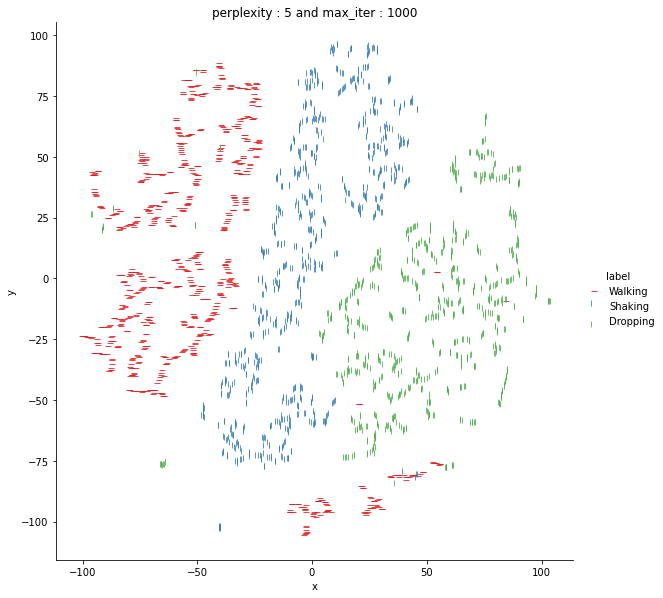

Done

performing tsne with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 2354 samples in 0.024s...
[t-SNE] Computed neighbors for 2354 samples in 0.290s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2354
[t-SNE] Computed conditional probabilities for sample 2000 / 2354
[t-SNE] Computed conditional probabilities for sample 2354 / 2354
[t-SNE] Mean sigma: 0.047985
[t-SNE] Computed conditional probabilities in 0.121s
[t-SNE] Iteration 50: error = 86.9176788, gradient norm = 0.1330642 (50 iterations in 2.049s)
[t-SNE] Iteration 100: error = 73.4580994, gradient norm = 0.0489865 (50 iterations in 1.973s)
[t-SNE] Iteration 150: error = 70.5490723, gradient norm = 0.0292753 (50 iterations in 1.695s)
[t-SNE] Iteration 200: error = 69.2122421, gradient norm = 0.0222356 (50 iterations in 1.087s)
[t-SNE] Iteration 250: error = 68.4288483, gradient norm = 0.0246932 (50 iterations in 1.274s)
[t-SNE] KL divergence after 250 

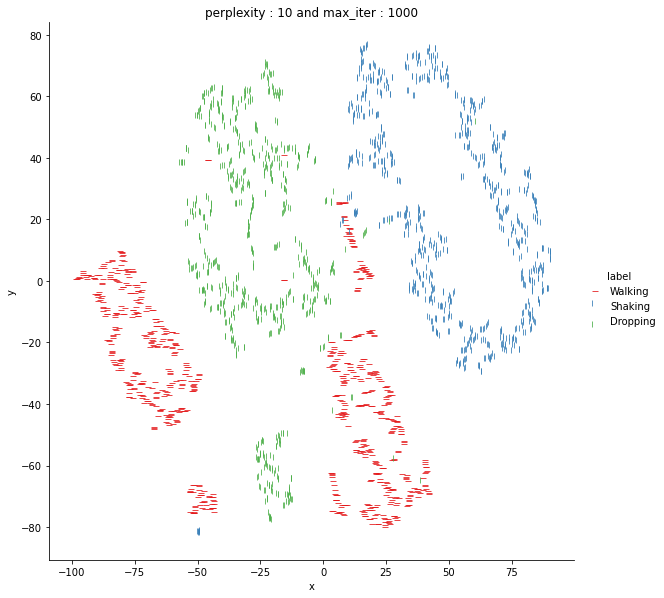

Done

performing tsne with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2354 samples in 0.021s...
[t-SNE] Computed neighbors for 2354 samples in 0.272s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2354
[t-SNE] Computed conditional probabilities for sample 2000 / 2354
[t-SNE] Computed conditional probabilities for sample 2354 / 2354
[t-SNE] Mean sigma: 0.060532
[t-SNE] Computed conditional probabilities in 0.214s
[t-SNE] Iteration 50: error = 77.5246353, gradient norm = 0.1170844 (50 iterations in 1.366s)
[t-SNE] Iteration 100: error = 66.0028610, gradient norm = 0.0319915 (50 iterations in 1.502s)
[t-SNE] Iteration 150: error = 63.9720612, gradient norm = 0.0248550 (50 iterations in 1.221s)
[t-SNE] Iteration 200: error = 63.0969849, gradient norm = 0.0122252 (50 iterations in 1.496s)
[t-SNE] Iteration 250: error = 62.6133614, gradient norm = 0.0119219 (50 iterations in 1.483s)
[t-SNE] KL divergence after 250 

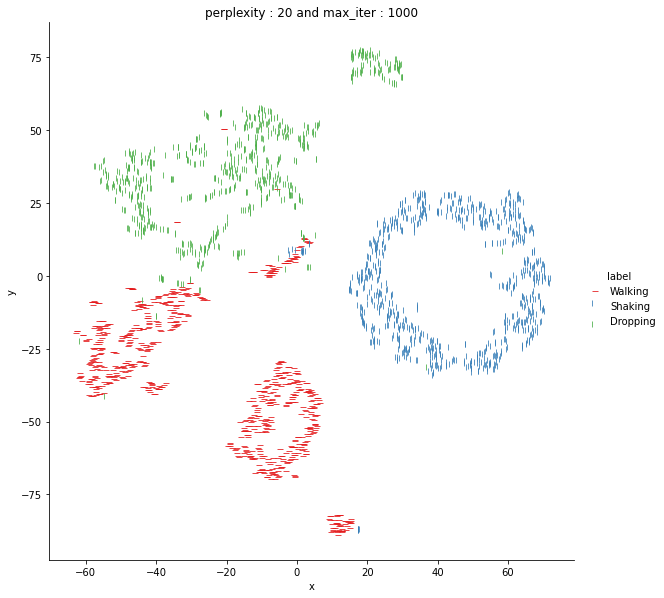

Done

performing tsne with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2354 samples in 0.025s...
[t-SNE] Computed neighbors for 2354 samples in 0.644s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2354
[t-SNE] Computed conditional probabilities for sample 2000 / 2354
[t-SNE] Computed conditional probabilities for sample 2354 / 2354
[t-SNE] Mean sigma: 0.083746
[t-SNE] Computed conditional probabilities in 0.630s
[t-SNE] Iteration 50: error = 64.7668381, gradient norm = 0.0915593 (50 iterations in 1.573s)
[t-SNE] Iteration 100: error = 57.8299828, gradient norm = 0.0216264 (50 iterations in 1.723s)
[t-SNE] Iteration 150: error = 56.6844940, gradient norm = 0.0139228 (50 iterations in 2.738s)
[t-SNE] Iteration 200: error = 56.1775894, gradient norm = 0.0078087 (50 iterations in 2.256s)
[t-SNE] Iteration 250: error = 55.8840904, gradient norm = 0.0088574 (50 iterations in 2.021s)
[t-SNE] KL divergence after 250

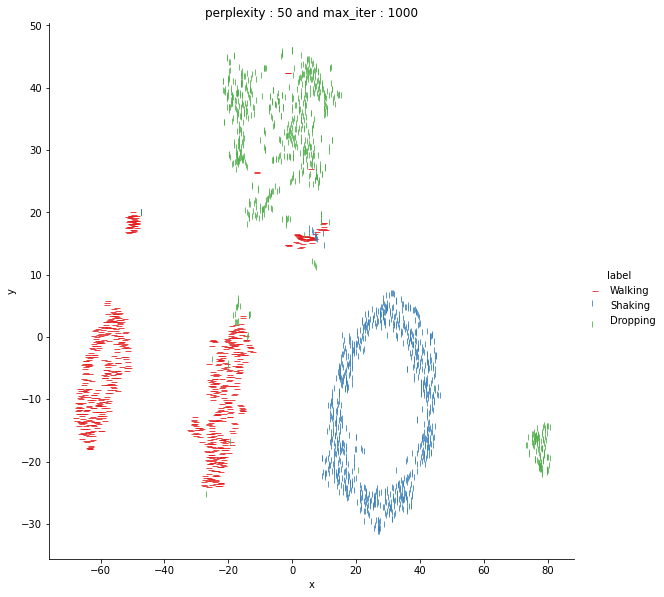

Done


In [63]:
perform_tsne(X = X_pre_tsne,y=y_pre_tsne, perplexities =[2,5,10,20,50])

In [64]:
X_train.describe()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
count,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000
mean,0.595964,0.484346,0.347539,0.525249,0.501040,0.538591,0.643523,0.369210,0.411957,0.312455,0.406449,0.566195
std,0.072139,0.145004,0.072001,0.060333,0.039182,0.159624,0.154619,0.256254,0.150487,0.246887,0.221511,0.153546
min,0.000000,0.000000,0.052508,0.000000,0.003462,0.000000,0.000000,0.007376,0.048301,0.000000,0.028320,0.000397
25%,0.560620,0.430018,0.304762,0.501414,0.490495,0.487383,0.539497,0.104725,0.314350,0.148049,0.207444,0.503329
50%,0.606170,0.486469,0.335434,0.529876,0.501056,0.538902,0.648803,0.371131,0.378017,0.233733,0.393394,0.536259
75%,0.642273,0.503356,0.380073,0.551735,0.511223,0.599834,0.744753,0.565440,0.458295,0.336386,0.499618,0.715742
max,0.929825,1.000000,0.993275,0.828381,1.000000,0.958661,1.000000,0.996649,1.000000,1.000000,1.000000,1.000000


In [65]:
X_train=getNormalizedData(X_train);
X_train.describe()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
count,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000,2354.000000
mean,0.640942,0.484346,0.313606,0.634067,0.499307,0.561816,0.643523,0.365757,0.382112,0.312455,0.389149,0.566023
std,0.077584,0.145004,0.076535,0.072832,0.039318,0.166508,0.154619,0.259033,0.158125,0.246887,0.227966,0.153607
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.602930,0.430018,0.268137,0.605294,0.488725,0.508400,0.539497,0.098405,0.279552,0.148049,0.184345,0.503132
50%,0.651919,0.486469,0.300739,0.639653,0.499323,0.562141,0.648803,0.367699,0.346450,0.233733,0.375714,0.536075
75%,0.690746,0.503356,0.348189,0.666041,0.509525,0.625700,0.744753,0.564115,0.430802,0.336386,0.485035,0.715630
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
X_val=getNormalizedData(X_val);
X_val.describe()

,Acc_X,Acc_Y,Acc_Z,AngV_X,AngV_Y,AngV_Z,Mag_X,Mag_Y,Mag_Z,Orin_X,Orin_Y,Orin_Z
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,0.633951,0.453606,0.231459,0.636240,0.705737,0.553701,0.639611,0.386106,0.369091,0.329560,0.435418,0.571988
std,0.076093,0.155003,0.099505,0.098150,0.063757,0.174201,0.166160,0.254239,0.159288,0.251597,0.230458,0.153927
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.597602,0.390716,0.176797,0.608259,0.696088,0.505945,0.542921,0.113301,0.256267,0.158297,0.221736,0.503103
50%,0.639835,0.454247,0.212898,0.642890,0.709059,0.547638,0.646517,0.394113,0.329283,0.252331,0.414523,0.533984
75%,0.686621,0.479931,0.269207,0.675049,0.724264,0.641061,0.749016,0.605405,0.432098,0.353604,0.587940,0.723725
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Implementing Machine Learning Algorithms

In [69]:
labels=['Walking','Shaking','Dropping']

## Decision Tree, KNN, SVM, Logisitc Regerssion and Random Forest

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 

In [71]:
classifiers = [
    DecisionTreeClassifier(),
    KNeighborsClassifier(4),
    SVC(decision_function_shape='ovr'),   
    LogisticRegression(solver='lbfgs', multi_class='multinomial'), 
    RandomForestClassifier(n_estimators=10)
]

names = []
scores = []

for clf in classifiers:
    clf = clf.fit(X_train, y_train)
    ypred = clf.predict(X_test)
    
    names.append(clf.__class__.__name__)
    scores.append(accuracy_score(ypred, y_test))

score_df = pd.DataFrame({'Model': names, 'Accuracy': scores}).set_index('Model')
score_df

,Accuracy
Model,
DecisionTreeClassifier,0.955163
KNeighborsClassifier,0.985054
SVC,0.978261
LogisticRegression,0.932065
RandomForestClassifier,0.960598


[Text(0, 0, 'DecisionTreeClassifier'),
 Text(1, 0, 'KNeighborsClassifier'),
 Text(2, 0, 'SVC'),
 Text(3, 0, 'LogisticRegression'),
 Text(4, 0, 'RandomForestClassifier')]

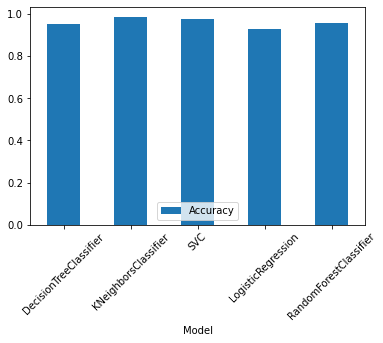

In [72]:
ax = score_df.plot.bar()
ax.set_xticklabels(score_df.index, rotation=45, fontsize=10)

# Implementing Neural Network

In [73]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [74]:
def simplemodel(n_inputs=12, n_outputs=3, optimizerinput='adam'):
    
    model = Sequential()
    
    model.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    
    model.add(layers.Dense(2000, activation='relu'))
    
    model.add(layers.Dense(4, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizerinput, metrics=['accuracy'])
    
    return model

#### Hyperparameter Tuning to Tune Batch Size and Number of Epochs

In [75]:
model = KerasClassifier(build_fn=simplemodel, n_inputs=len(X.columns), n_outputs=3, verbose=1)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100,500]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
368/368 [==============================] - 5s 6ms/step - loss: 0.7871 - accuracy: 0.7037: 
Epoch 2/100
368/368 [==============================] - 2s 5ms/step - loss: 0.2604 - accuracy: 0.9373
Epoch 3/100
368/368 [==============================] - 3s 7ms/step - loss: 0.1591 - accuracy: 0.9528
Epoch 4/100
368/368 [==============================] - 2s 5ms/step - loss: 0.1419 - accuracy: 0.9605
Epoch 5/100
368/368 [==============================] - 1s 4ms/step - loss: 0.1332 - accuracy: 0.9570
Epoch 6/100
368/368 [==============================] - 1s 3ms/step - loss: 0.1469 - accuracy: 0.9533
Epoch 7/100
368/368 [==============================] - 1s 3ms/step - loss: 0.1379 - accuracy: 0.9557
Epoch 8/100
368/368 [==============================] - 1s 4ms/step - loss: 0.1507 - accuracy: 0.9501
Epoch 9/100
368/368 [==============================] - 1s 4ms/step - loss: 0.1234 - accuracy: 0.9608
Epoch 10/100
368/368 [==============================] - 1s 4ms/step - loss: 0.1271 - accu

368/368 [==============================] - 2s 5ms/step - loss: 0.0226 - accuracy: 0.9910
Epoch 81/100
368/368 [==============================] - 2s 5ms/step - loss: 0.0278 - accuracy: 0.9886
Epoch 82/100
368/368 [==============================] - 1s 4ms/step - loss: 0.0159 - accuracy: 0.9947
Epoch 83/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0189 - accuracy: 0.9915
Epoch 84/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0240 - accuracy: 0.9899
Epoch 85/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0231 - accuracy: 0.9930
Epoch 86/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0204 - accuracy: 0.9911
Epoch 87/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0156 - accuracy: 0.9935: 0s
Epoch 88/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0186 - accuracy: 0.9935
Epoch 89/100
368/368 [==============================] - 1s 3ms/step - loss: 0.0170 - accura

#### Hyperparameter Tuning to Tune Optimization Algorithm

In [77]:
model = KerasClassifier(build_fn=simplemodel, n_inputs=len(X.columns), epochs=100, batch_size=10, n_outputs=3, verbose=1)

optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
368/368 [==============================] - 2s 2ms/step - loss: 0.7772 - accuracy: 0.6713
Epoch 2/100
368/368 [==============================] - 1s 2ms/step - loss: 0.2788 - accuracy: 0.9287
Epoch 3/100
368/368 [==============================] - 1s 2ms/step - loss: 0.1551 - accuracy: 0.9542
Epoch 4/100
368/368 [==============================] - 1s 2ms/step - loss: 0.1547 - accuracy: 0.9501
Epoch 5/100
368/368 [==============================] - 1s 2ms/step - loss: 0.1317 - accuracy: 0.9574
Epoch 6/100
368/368 [==============================] - 1s 2ms/step - loss: 0.1387 - accuracy: 0.9513
Epoch 7/100
368/368 [==============================] - 1s 2ms/step - loss: 0.1198 - accuracy: 0.9658
Epoch 8/100
368/368 [==============================] - 1s 2ms/step - loss: 0.1326 - accuracy: 0.9600
Epoch 9/100
368/368 [==============================] - 1s 2ms/step - loss: 0.1138 - accuracy: 0.9690
Epoch 10/100
368/368 [==============================] - 1s 2ms/step - loss: 0.1061 - accura

368/368 [==============================] - 2s 4ms/step - loss: 0.0170 - accuracy: 0.9936
Epoch 82/100
368/368 [==============================] - 1s 4ms/step - loss: 0.0170 - accuracy: 0.9943
Epoch 83/100
368/368 [==============================] - 1s 4ms/step - loss: 0.0198 - accuracy: 0.9928
Epoch 84/100
368/368 [==============================] - 2s 5ms/step - loss: 0.0181 - accuracy: 0.9926
Epoch 85/100
368/368 [==============================] - 1s 4ms/step - loss: 0.0230 - accuracy: 0.9897
Epoch 86/100
368/368 [==============================] - 2s 4ms/step - loss: 0.0117 - accuracy: 0.9944
Epoch 87/100
368/368 [==============================] - 2s 4ms/step - loss: 0.0346 - accuracy: 0.9886
Epoch 88/100
368/368 [==============================] - 2s 5ms/step - loss: 0.0128 - accuracy: 0.9952
Epoch 89/100
368/368 [==============================] - 1s 4ms/step - loss: 0.0240 - accuracy: 0.9893
Epoch 90/100
368/368 [==============================] - 1s 4ms/step - loss: 0.0064 - accuracy: 

#### Training the Model

In [80]:
model=simplemodel(len(X_train.columns),n_outputs=3, optimizerinput='Adam');
history = model.fit(X_train, y_train, verbose=1, epochs=100, batch_size=10, validation_data=(X_val, y_val))

Epoch 1/100
236/236 [==============================] - 2s 5ms/step - loss: 0.9468 - accuracy: 0.5904 - val_loss: 0.2597 - val_accuracy: 0.9338
Epoch 2/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2607 - accuracy: 0.9271 - val_loss: 0.1609 - val_accuracy: 0.9626
Epoch 3/100
236/236 [==============================] - 1s 3ms/step - loss: 0.1825 - accuracy: 0.9528 - val_loss: 0.1422 - val_accuracy: 0.9694
Epoch 4/100
236/236 [==============================] - 1s 4ms/step - loss: 0.1547 - accuracy: 0.9545 - val_loss: 0.1189 - val_accuracy: 0.9610
Epoch 5/100
236/236 [==============================] - 1s 4ms/step - loss: 0.1473 - accuracy: 0.9532 - val_loss: 0.1264 - val_accuracy: 0.9576
Epoch 6/100
236/236 [==============================] - 1s 3ms/step - loss: 0.1301 - accuracy: 0.9576 - val_loss: 0.1169 - val_accuracy: 0.9610
Epoch 7/100
236/236 [==============================] - 1s 4ms/step - loss: 0.1539 - accuracy: 0.9537 - val_loss: 0.1133 - val_accuracy: 0.9677

Epoch 58/100
236/236 [==============================] - 1s 3ms/step - loss: 0.0384 - accuracy: 0.9861 - val_loss: 0.0396 - val_accuracy: 0.9813
Epoch 59/100
236/236 [==============================] - 1s 3ms/step - loss: 0.0319 - accuracy: 0.9863 - val_loss: 0.0439 - val_accuracy: 0.9796
Epoch 60/100
236/236 [==============================] - 1s 3ms/step - loss: 0.0470 - accuracy: 0.9788 - val_loss: 0.0320 - val_accuracy: 0.9881
Epoch 61/100
236/236 [==============================] - 1s 3ms/step - loss: 0.0428 - accuracy: 0.9843 - val_loss: 0.0428 - val_accuracy: 0.9881
Epoch 62/100
236/236 [==============================] - 1s 3ms/step - loss: 0.0461 - accuracy: 0.9810 - val_loss: 0.0301 - val_accuracy: 0.9881
Epoch 63/100
236/236 [==============================] - 1s 4ms/step - loss: 0.0403 - accuracy: 0.9863 - val_loss: 0.0410 - val_accuracy: 0.9830
Epoch 64/100
236/236 [==============================] - 1s 4ms/step - loss: 0.0401 - accuracy: 0.9881 - val_loss: 0.0376 - val_accuracy:

#### Evaluating the Model

In [82]:
from numpy import argmax
loss, acc = model.evaluate(X_test, y_test, verbose=0)

print('Loss =',loss)
print('Accuracy =',acc)

Loss = 0.3024035394191742
Accuracy = 0.9130434989929199


In [83]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_10 (Dense)             (None, 2000)              26000     
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 8004      
Total params: 34,160
Trainable params: 34,160
Non-trainable params: 0
_________________________________________________________________


In [84]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### Graph for train vs validation loss for different epochs

   loss_train  loss_val  diff_in_loss
0    0.647211  0.259677      0.387534
1    0.252782  0.160893      0.091889
2    0.178086  0.142166      0.035920
3    0.154890  0.118874      0.036016
4    0.146106  0.126366      0.019740
5    0.132892  0.116868      0.016024
6    0.131053  0.113313      0.017740
7    0.123045  0.112055      0.010991
8    0.126816  0.108631      0.018185
9    0.122037  0.112706      0.009331


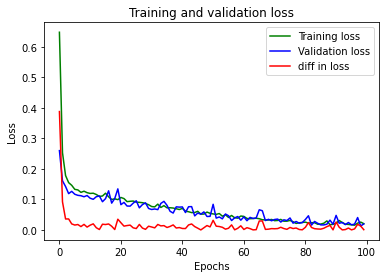

In [85]:
loss = history.history['loss']
val_loss = history.history['val_loss']
diff_in_loss=abs(np.subtract(val_loss,loss));

df = pd.DataFrame({'loss_train':loss, 'loss_val':val_loss, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Graph for train vs validation accuracy for different epochs

   accuracy_train  accuracy_val  diff_in_accuracy
0        0.765081      0.933786          0.168705
1        0.934579      0.962649          0.028069
2        0.951997      0.969440          0.017443
3        0.952421      0.960951          0.008529
4        0.951572      0.957555          0.005983
5        0.956670      0.960951          0.004281
6        0.957944      0.967742          0.009798
7        0.961342      0.960951          0.000392
8        0.955820      0.960951          0.005131
9        0.960068      0.971138          0.011070


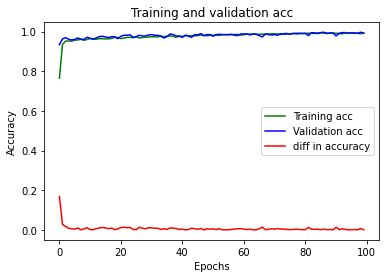

In [86]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
diff_in_accuracy=abs(np.subtract(val_accuracy,accuracy));

df = pd.DataFrame({'accuracy_train':accuracy, 'accuracy_val':val_accuracy, 'diff_in_accuracy':diff_in_accuracy})
print(df.head(10))
epochs = range(len(accuracy))

plt.figure()

plt.plot(epochs, accuracy, 'g', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.plot(epochs, diff_in_accuracy, 'r', label='diff in accuracy')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Implement Neural Network 2  (Adding more Hidden Layers)

In [87]:
def simplemodel2(n_inputs=12, n_outputs=3, optimizerinput='adam'):
    
    network = Sequential()
    
    network.add(layers.Dense(n_inputs, input_dim=n_inputs, kernel_initializer='normal', activation='relu'))
    network.add(layers.Dense(16, activation='relu')) 
    network.add(layers.Dense(6, activation='relu'))
    network.add(layers.Dense(4, activation='relu'))
    network.add(layers.Dense(20, activation='relu'))
    network.add(layers.Dense(4, activation='softmax'))
    
    network.compile(loss='sparse_categorical_crossentropy', optimizer=optimizerinput, metrics=['accuracy'])
    
    return network

#### Hyperparameter Tuning to Tune Batch Size and Number of Epochs

In [88]:
model = KerasClassifier(build_fn=simplemodel2, n_inputs=len(X.columns), n_outputs=3, verbose=1)

batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
184/184 [==============================] - 5s 3ms/step - loss: 1.2697 - accuracy: 0.3502
Epoch 2/100
184/184 [==============================] - 0s 2ms/step - loss: 0.9902 - accuracy: 0.5117
Epoch 3/100
184/184 [==============================] - 1s 3ms/step - loss: 0.4142 - accuracy: 0.8929
Epoch 4/100
184/184 [==============================] - 0s 3ms/step - loss: 0.3040 - accuracy: 0.9063
Epoch 5/100
184/184 [==============================] - 0s 3ms/step - loss: 0.2643 - accuracy: 0.9205
Epoch 6/100
184/184 [==============================] - 1s 3ms/step - loss: 0.2619 - accuracy: 0.9190: 0s - loss: 0.2864 - ac
Epoch 7/100
184/184 [==============================] - 0s 3ms/step - loss: 0.2519 - accuracy: 0.9240
Epoch 8/100
184/184 [==============================] - 1s 4ms/step - loss: 0.2416 - accuracy: 0.9261
Epoch 9/100
184/184 [==============================] - 1s 3ms/step - loss: 0.2472 - accuracy: 0.9255
Epoch 10/100
184/184 [==============================] - 1s 4ms/step

Epoch 80/100
184/184 [==============================] - 1s 3ms/step - loss: 0.0806 - accuracy: 0.9756
Epoch 81/100
184/184 [==============================] - 1s 3ms/step - loss: 0.0950 - accuracy: 0.9725
Epoch 82/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0738 - accuracy: 0.9739
Epoch 83/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0946 - accuracy: 0.9703
Epoch 84/100
184/184 [==============================] - 1s 6ms/step - loss: 0.0779 - accuracy: 0.9739
Epoch 85/100
184/184 [==============================] - 1s 3ms/step - loss: 0.0894 - accuracy: 0.9687
Epoch 86/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0924 - accuracy: 0.9697
Epoch 87/100
184/184 [==============================] - 1s 6ms/step - loss: 0.0852 - accuracy: 0.9679
Epoch 88/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0730 - accuracy: 0.9761
Epoch 89/100
184/184 [==============================] - 1s 5ms/step - loss: 0.0943

#### Hyperparameter Tuning to Tune Optimization Algorithm

In [89]:
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(build_fn=simplemodel2, n_inputs=len(X.columns), epochs=100, batch_size=20, n_outputs=3, verbose=1)

optimizer = ['RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizerinput=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Epoch 1/100
184/184 [==============================] - 2s 2ms/step - loss: 1.2522 - accuracy: 0.3450
Epoch 2/100
184/184 [==============================] - 0s 2ms/step - loss: 0.7777 - accuracy: 0.6195
Epoch 3/100
184/184 [==============================] - 0s 2ms/step - loss: 0.5396 - accuracy: 0.8950
Epoch 4/100
184/184 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.9127
Epoch 5/100
184/184 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.9220
Epoch 6/100
184/184 [==============================] - 0s 2ms/step - loss: 0.2279 - accuracy: 0.9355
Epoch 7/100
184/184 [==============================] - 0s 2ms/step - loss: 0.2136 - accuracy: 0.9407
Epoch 8/100
184/184 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9385
Epoch 9/100
184/184 [==============================] - 0s 2ms/step - loss: 0.1892 - accuracy: 0.9454
Epoch 10/100
184/184 [==============================] - 0s 2ms/step - loss: 0.1802 - accura

184/184 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9687
Epoch 81/100
184/184 [==============================] - 0s 2ms/step - loss: 0.0894 - accuracy: 0.9673
Epoch 82/100
184/184 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9752
Epoch 83/100
184/184 [==============================] - 0s 2ms/step - loss: 0.0994 - accuracy: 0.9671
Epoch 84/100
184/184 [==============================] - 0s 2ms/step - loss: 0.0800 - accuracy: 0.9734
Epoch 85/100
184/184 [==============================] - 0s 2ms/step - loss: 0.0850 - accuracy: 0.9681
Epoch 86/100
184/184 [==============================] - 0s 2ms/step - loss: 0.0666 - accuracy: 0.9763
Epoch 87/100
184/184 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9757
Epoch 88/100
184/184 [==============================] - 0s 2ms/step - loss: 0.0639 - accuracy: 0.9815
Epoch 89/100
184/184 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 

#### Training the model

In [90]:
network=simplemodel2(len(X_train.columns),n_outputs=3, optimizerinput='Adam');
history = network.fit(X_train, y_train, verbose=1, epochs=100, batch_size=20, validation_data=(X_val, y_val))

Epoch 1/100
236/236 [==============================] - 2s 5ms/step - loss: 1.2344 - accuracy: 0.3275 - val_loss: 0.6936 - val_accuracy: 0.8778
Epoch 2/100
236/236 [==============================] - 1s 2ms/step - loss: 0.5808 - accuracy: 0.8798 - val_loss: 0.3148 - val_accuracy: 0.9304
Epoch 3/100
236/236 [==============================] - 1s 2ms/step - loss: 0.3547 - accuracy: 0.9187 - val_loss: 0.3173 - val_accuracy: 0.8879
Epoch 4/100
236/236 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.9164 - val_loss: 0.2371 - val_accuracy: 0.9338
Epoch 5/100
236/236 [==============================] - 1s 2ms/step - loss: 0.2709 - accuracy: 0.9274 - val_loss: 0.2253 - val_accuracy: 0.9372
Epoch 6/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2639 - accuracy: 0.9282 - val_loss: 0.2181 - val_accuracy: 0.9338
Epoch 7/100
236/236 [==============================] - 1s 3ms/step - loss: 0.2628 - accuracy: 0.9347 - val_loss: 0.2319 - val_accuracy: 0.9372

Epoch 58/100
236/236 [==============================] - 1s 3ms/step - loss: 0.0870 - accuracy: 0.9714 - val_loss: 0.1008 - val_accuracy: 0.9677
Epoch 59/100
236/236 [==============================] - 1s 3ms/step - loss: 0.1167 - accuracy: 0.9644 - val_loss: 0.0974 - val_accuracy: 0.9762
Epoch 60/100
236/236 [==============================] - 1s 3ms/step - loss: 0.0888 - accuracy: 0.9699 - val_loss: 0.0856 - val_accuracy: 0.9745
Epoch 61/100
236/236 [==============================] - 1s 2ms/step - loss: 0.1030 - accuracy: 0.9668 - val_loss: 0.0872 - val_accuracy: 0.9779
Epoch 62/100
236/236 [==============================] - 1s 2ms/step - loss: 0.0928 - accuracy: 0.9702 - val_loss: 0.0953 - val_accuracy: 0.9677
Epoch 63/100
236/236 [==============================] - 1s 2ms/step - loss: 0.0864 - accuracy: 0.9710 - val_loss: 0.0839 - val_accuracy: 0.9762
Epoch 64/100
236/236 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9798 - val_loss: 0.0865 - val_accuracy:

#### Evaluating the model

In [91]:
from numpy import argmax
loss, acc = network.evaluate(X_test, y_test, verbose=0)

print('Loss =',loss)
print('Accuracy =',acc)

Loss = 0.09552818536758423
Accuracy = 0.96875


In [92]:
network.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 12)                156       
_________________________________________________________________
dense_25 (Dense)             (None, 16)                208       
_________________________________________________________________
dense_26 (Dense)             (None, 6)                 102       
_________________________________________________________________
dense_27 (Dense)             (None, 4)                 28        
_________________________________________________________________
dense_28 (Dense)             (None, 20)                100       
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 84        
Total params: 678
Trainable params: 678
Non-trainable params: 0
________________________________________________________

#### Graph for train vs validation loss for different epochs

   loss_train  loss_val  diff_in_loss
0    1.065342  0.693632      0.371710
1    0.490472  0.314796      0.175676
2    0.331882  0.317256      0.014625
3    0.297302  0.237138      0.060164
4    0.284506  0.225301      0.059205
5    0.275259  0.218086      0.057173
6    0.274314  0.231860      0.042454
7    0.253019  0.203301      0.049717
8    0.247338  0.218222      0.029117
9    0.233596  0.192978      0.040619


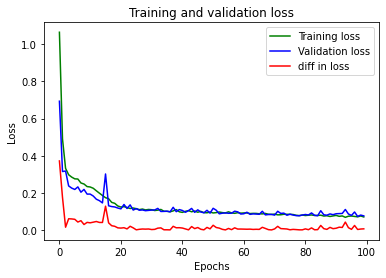

In [93]:
loss = history.history['loss']
val_loss = history.history['val_loss']
diff_in_loss=abs(np.subtract(val_loss,loss));

df = pd.DataFrame({'loss_train':loss, 'loss_val':val_loss, 'diff_in_loss':diff_in_loss})

print(df.head(10))

epochs = range(len(loss))

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.plot(epochs, diff_in_loss, 'r', label='diff in loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Graph for train vs validation accuracy for different epochs

   accuracy_train  accuracy_val  diff_in_accuracy
0        0.417587      0.877759          0.460172
1        0.891249      0.930390          0.039142
2        0.914613      0.887946          0.026668
3        0.917162      0.933786          0.016624
4        0.922260      0.937182          0.014922
5        0.927358      0.933786          0.006428
6        0.928632      0.937182          0.008550
7        0.928632      0.938879          0.010247
8        0.932031      0.937182          0.005151
9        0.932880      0.943973          0.011093


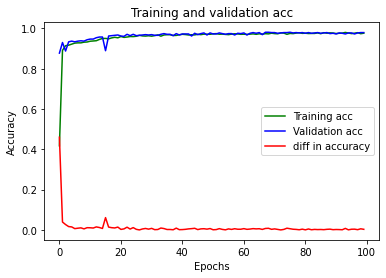

In [94]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
diff_in_accuracy=abs(np.subtract(val_accuracy,accuracy));

df = pd.DataFrame({'accuracy_train':accuracy, 'accuracy_val':val_accuracy, 'diff_in_accuracy':diff_in_accuracy})
print(df.head(10))
epochs = range(len(accuracy))

plt.figure()

plt.plot(epochs, accuracy, 'g', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.plot(epochs, diff_in_accuracy, 'r', label='diff in accuracy')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### Predicting only KNN model as it has the highest accuracy

In [106]:
clf=KNeighborsClassifier()
knn_model = clf.fit(X_train, y_train)
knn_model = knn_model.predict(X_test.head(10))

print(y_test.head(10))
print("The predictions are")
print(knn_model)
np.savetxt('X_test_predicted.csv', knn_model, delimiter=',')

3596    3
2826    3
1792    2
1794    2
2099    2
1552    2
3102    3
772     1
872     1
2876    3
Name: Activity, dtype: int64
The predictions are
[3 3 2 2 2 2 3 1 1 3]
